<a href="https://colab.research.google.com/github/jumadi-cloud/jurnal_diabetes-/blob/main/Jurnal_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
!wget -O diabetes_binary_health_indicators_BRFSS2015.csv https://raw.githubusercontent.com/jumadi-cloud/jurnal_diabetes-/main/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv

--2023-10-28 05:57:57--  https://raw.githubusercontent.com/jumadi-cloud/jurnal_diabetes-/main/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22738154 (22M) [text/plain]
Saving to: ‘diabetes_binary_health_indicators_BRFSS2015.csv’

diabetes_binary_hea 100%[===================>]  21.68M  --.-KB/s    in 0.08s   

2023-10-28 05:57:58 (259 MB/s) - ‘diabetes_binary_health_indicators_BRFSS2015.csv’ saved [22738154/22738154]



In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Obtain summary information, check for null values and data types that may need to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Get descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Identify, isolate, and drop rows with duplicates based on any appropriate variable or all together
df.duplicated().sum()

24206

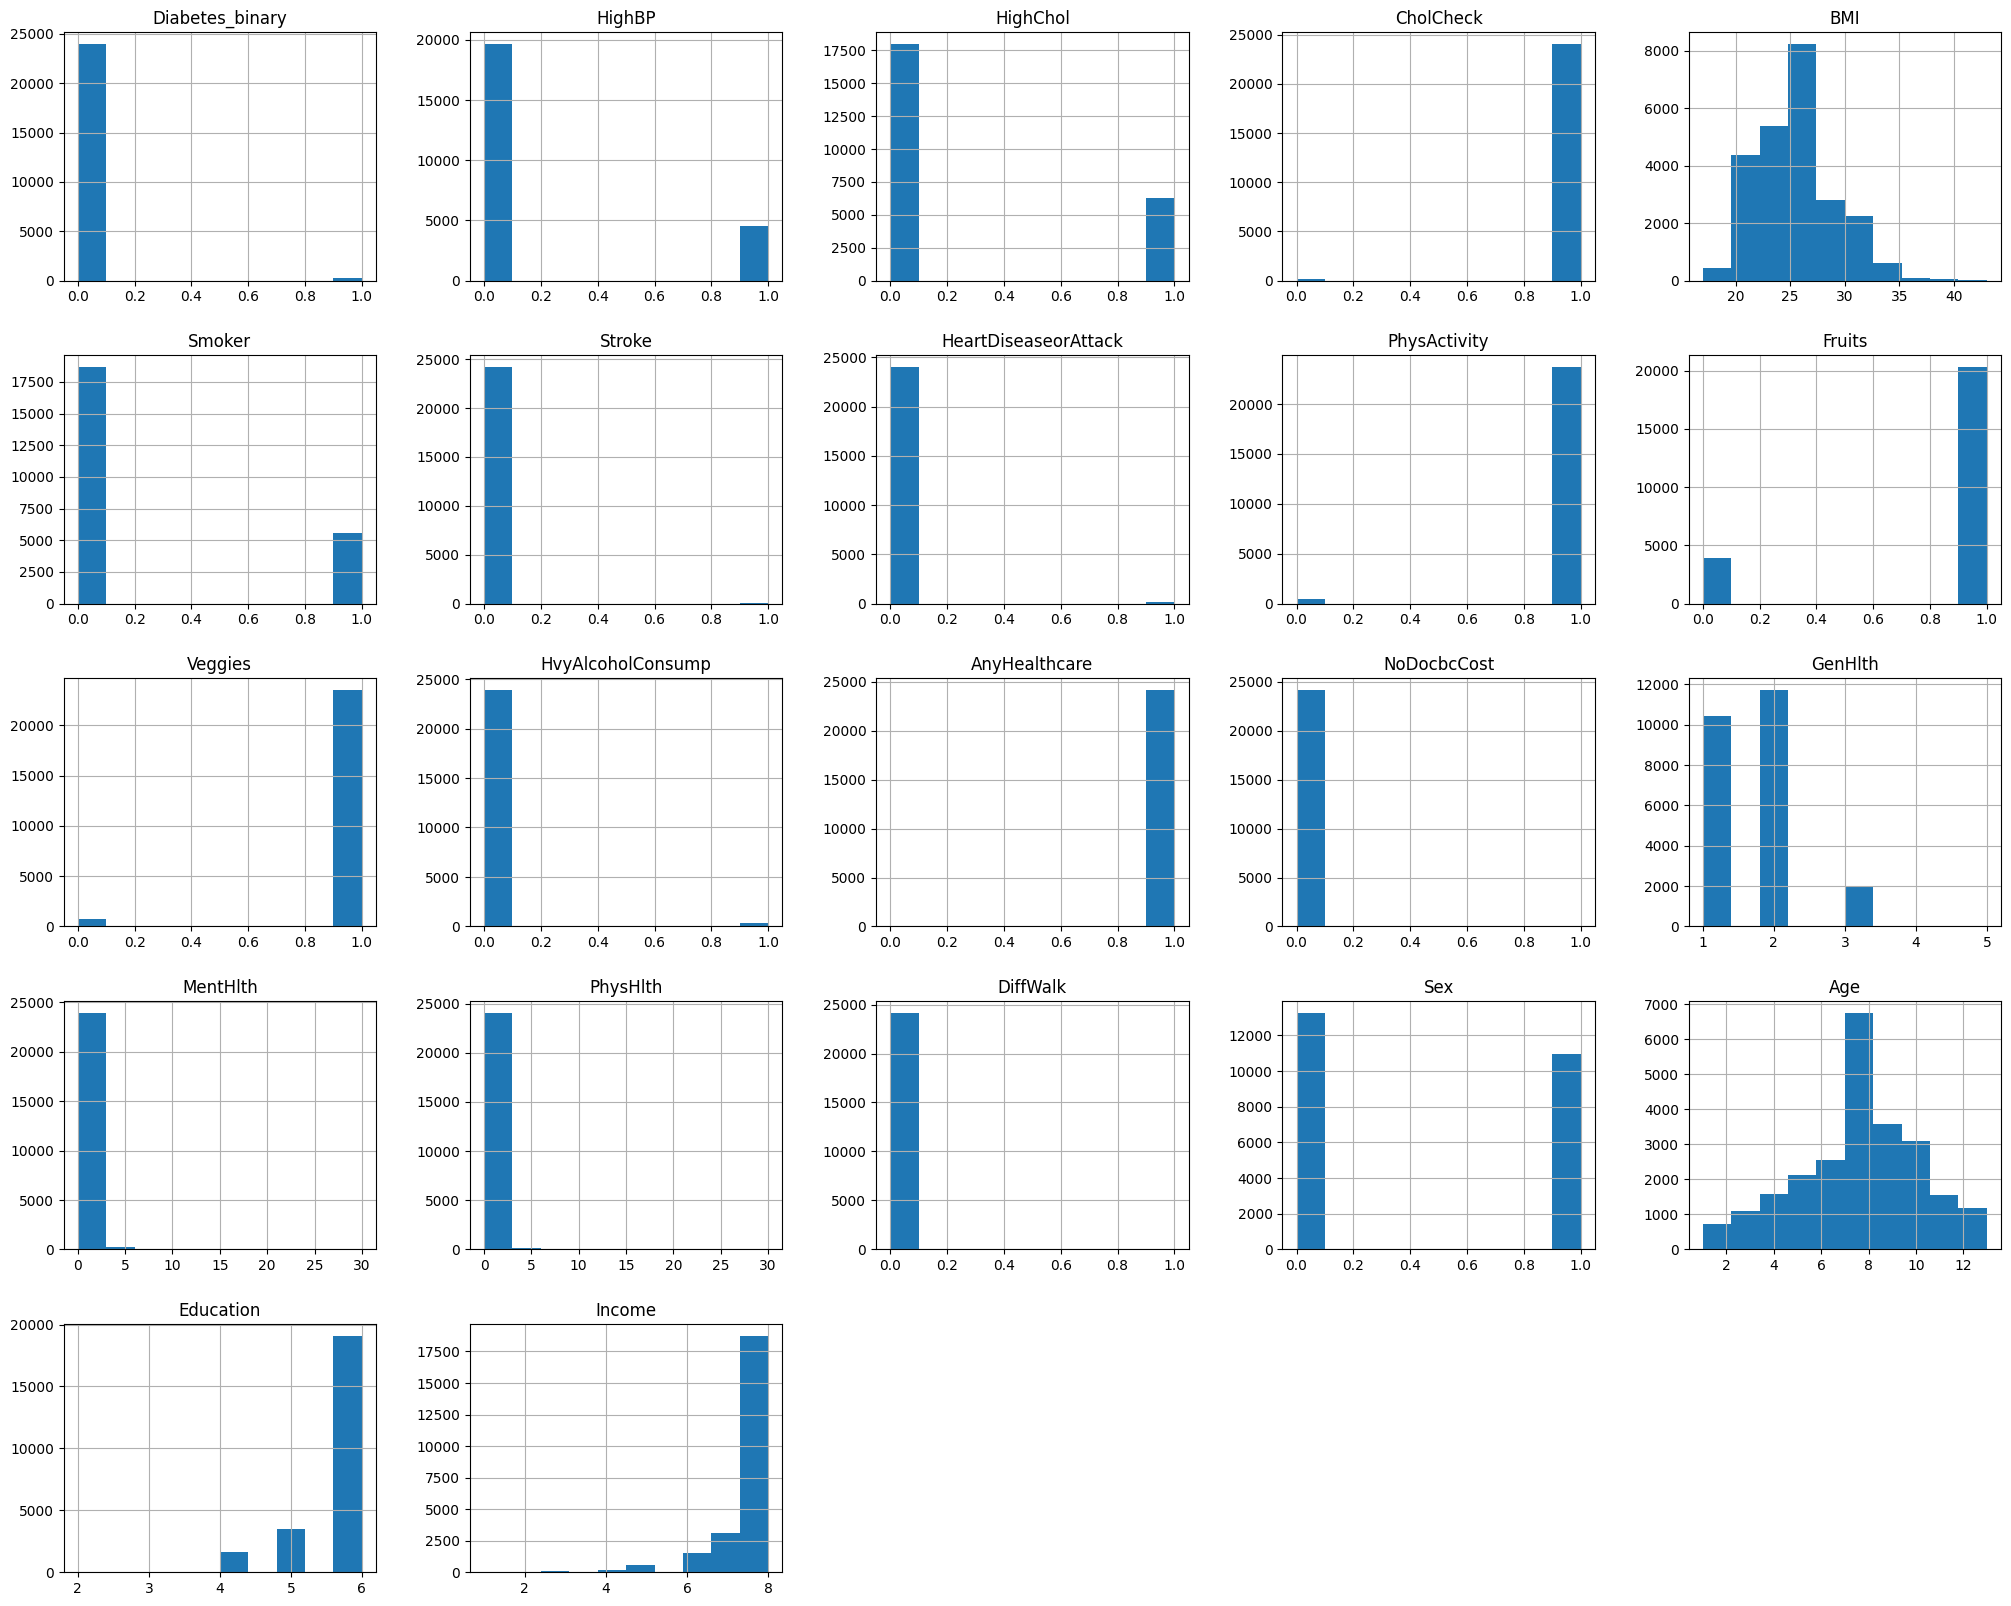

In [ ]:
# View the disribution of duplicates to see if the duplication is accidental or normal
duplicate_rows = df[df.duplicated()]

duplicate_rows.hist(figsize=(25,20));

In [ ]:
value_counts = duplicate_rows[duplicate_rows['Diabetes_binary'] == 1.0]['Diabetes_binary'].value_counts()
print(value_counts)

1.0    249
Name: Diabetes_binary, dtype: int64


In [ ]:
value_counts = duplicate_rows[duplicate_rows['CholCheck'] == 0.0]['Diabetes_binary'].value_counts()
print(value_counts)

0.0    172
Name: Diabetes_binary, dtype: int64


Data Cleaning


In [ ]:
# Change all floats to ints
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int)
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [ ]:
# Confirm all data types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Perform EDA

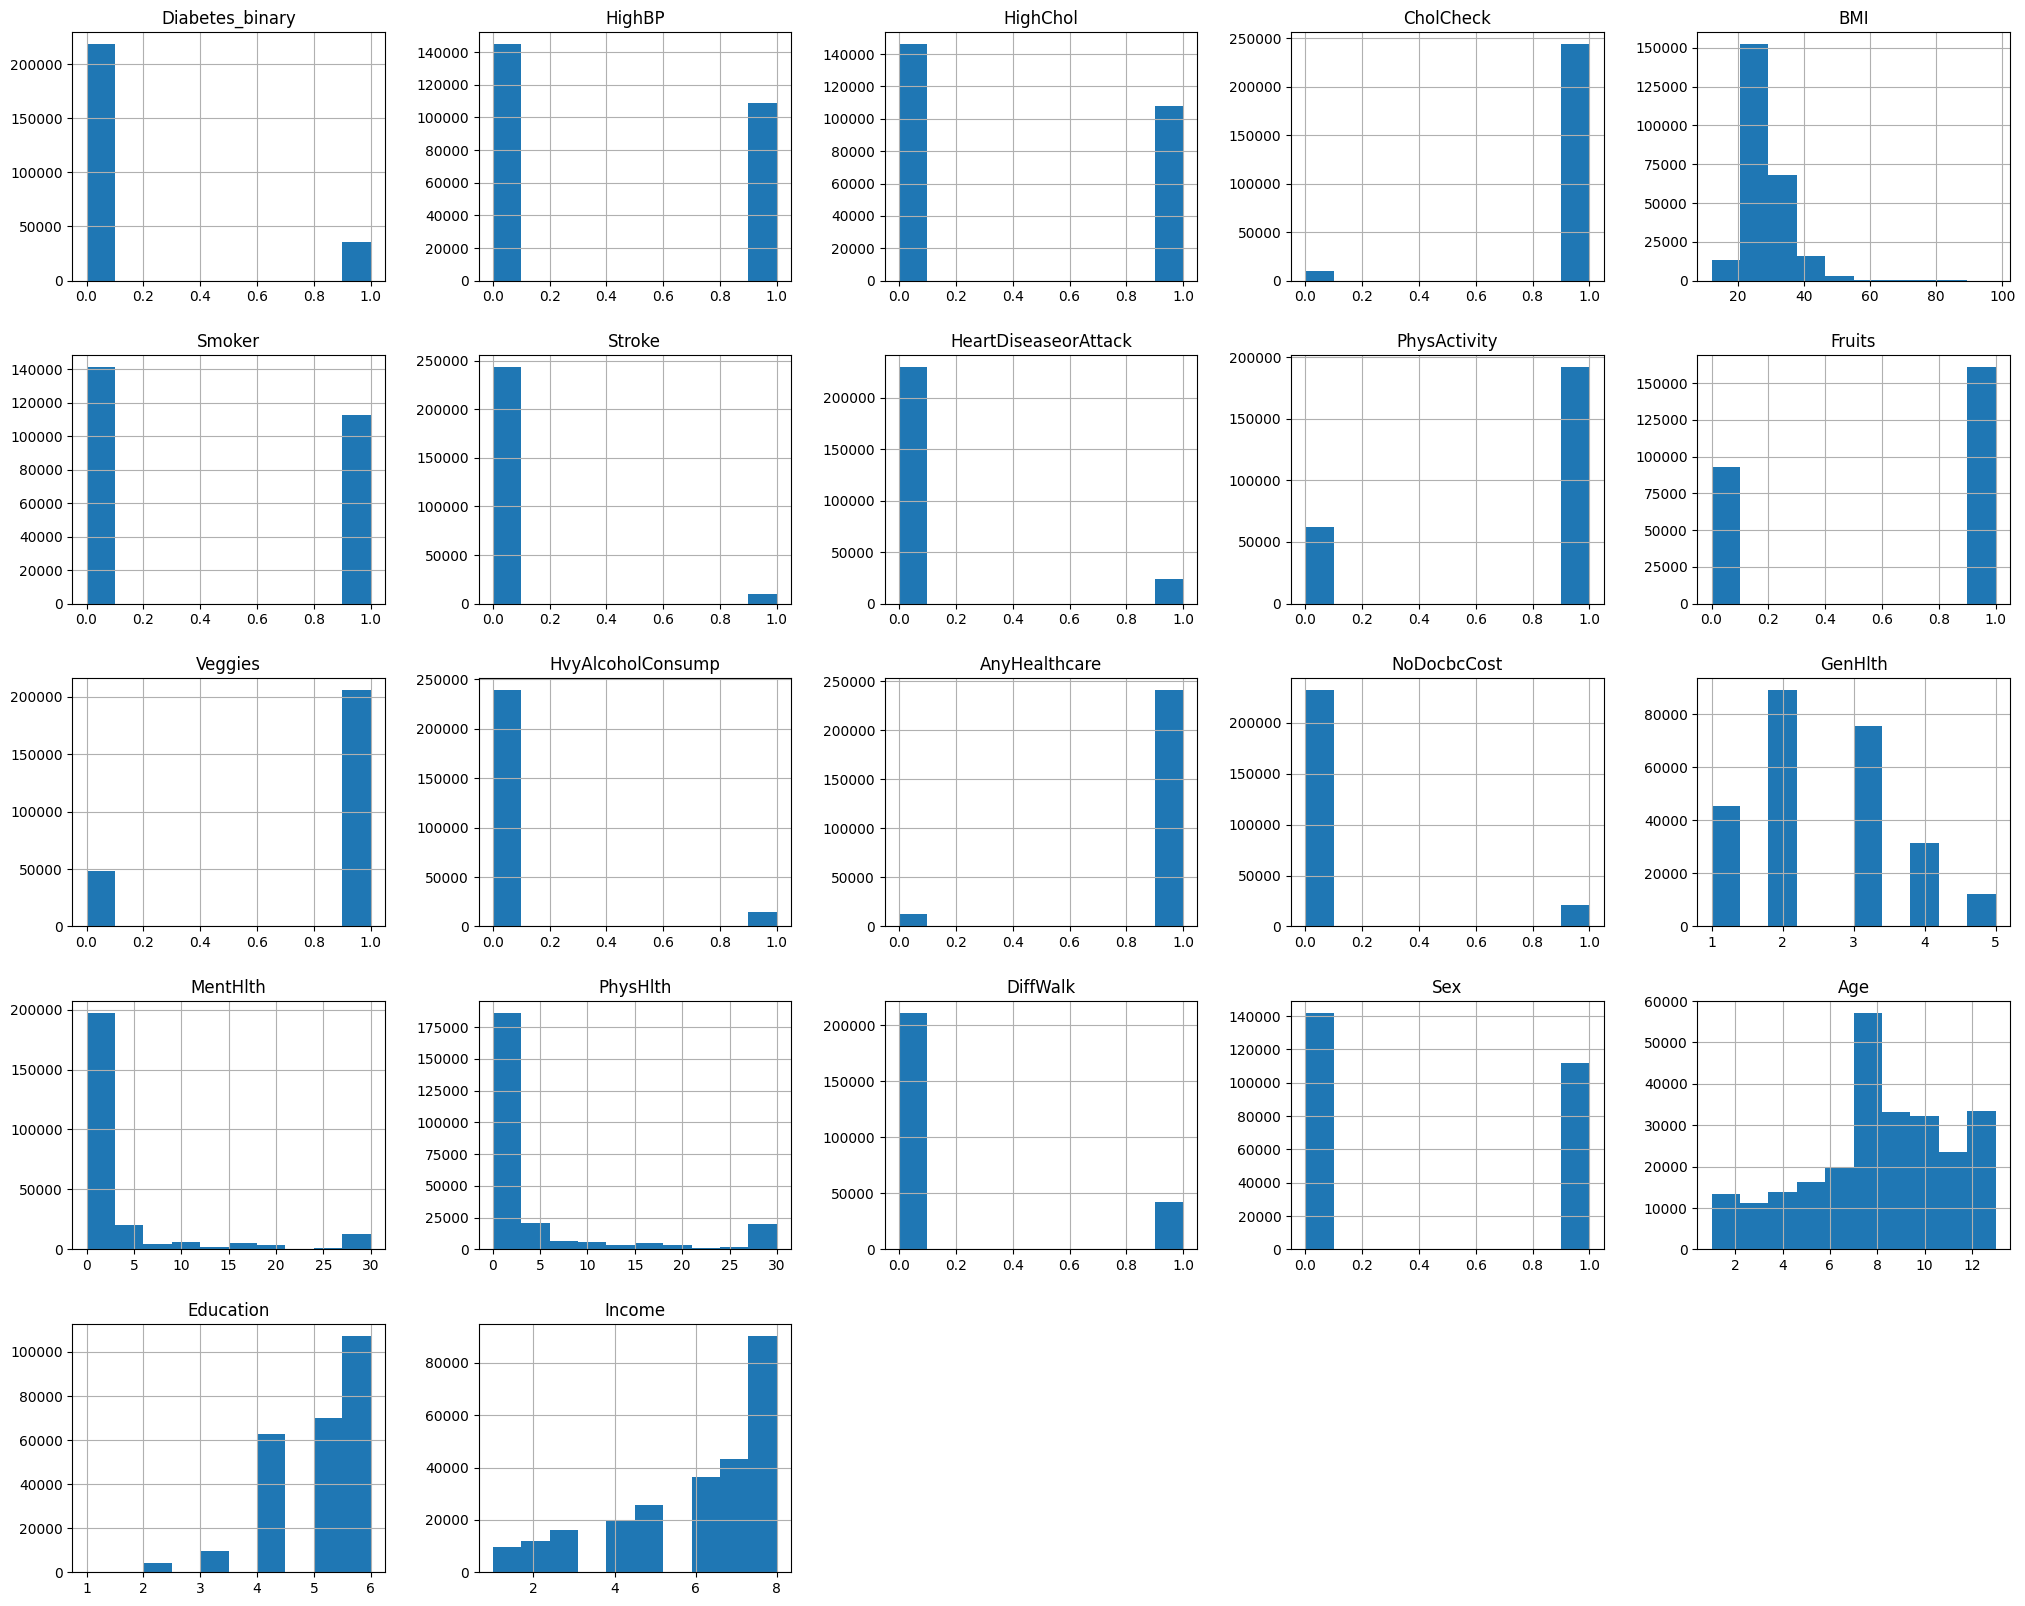

In [ ]:
# Visual representation of value counts
df.hist(figsize=(25,20));

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Diabetes Variable Correlations')

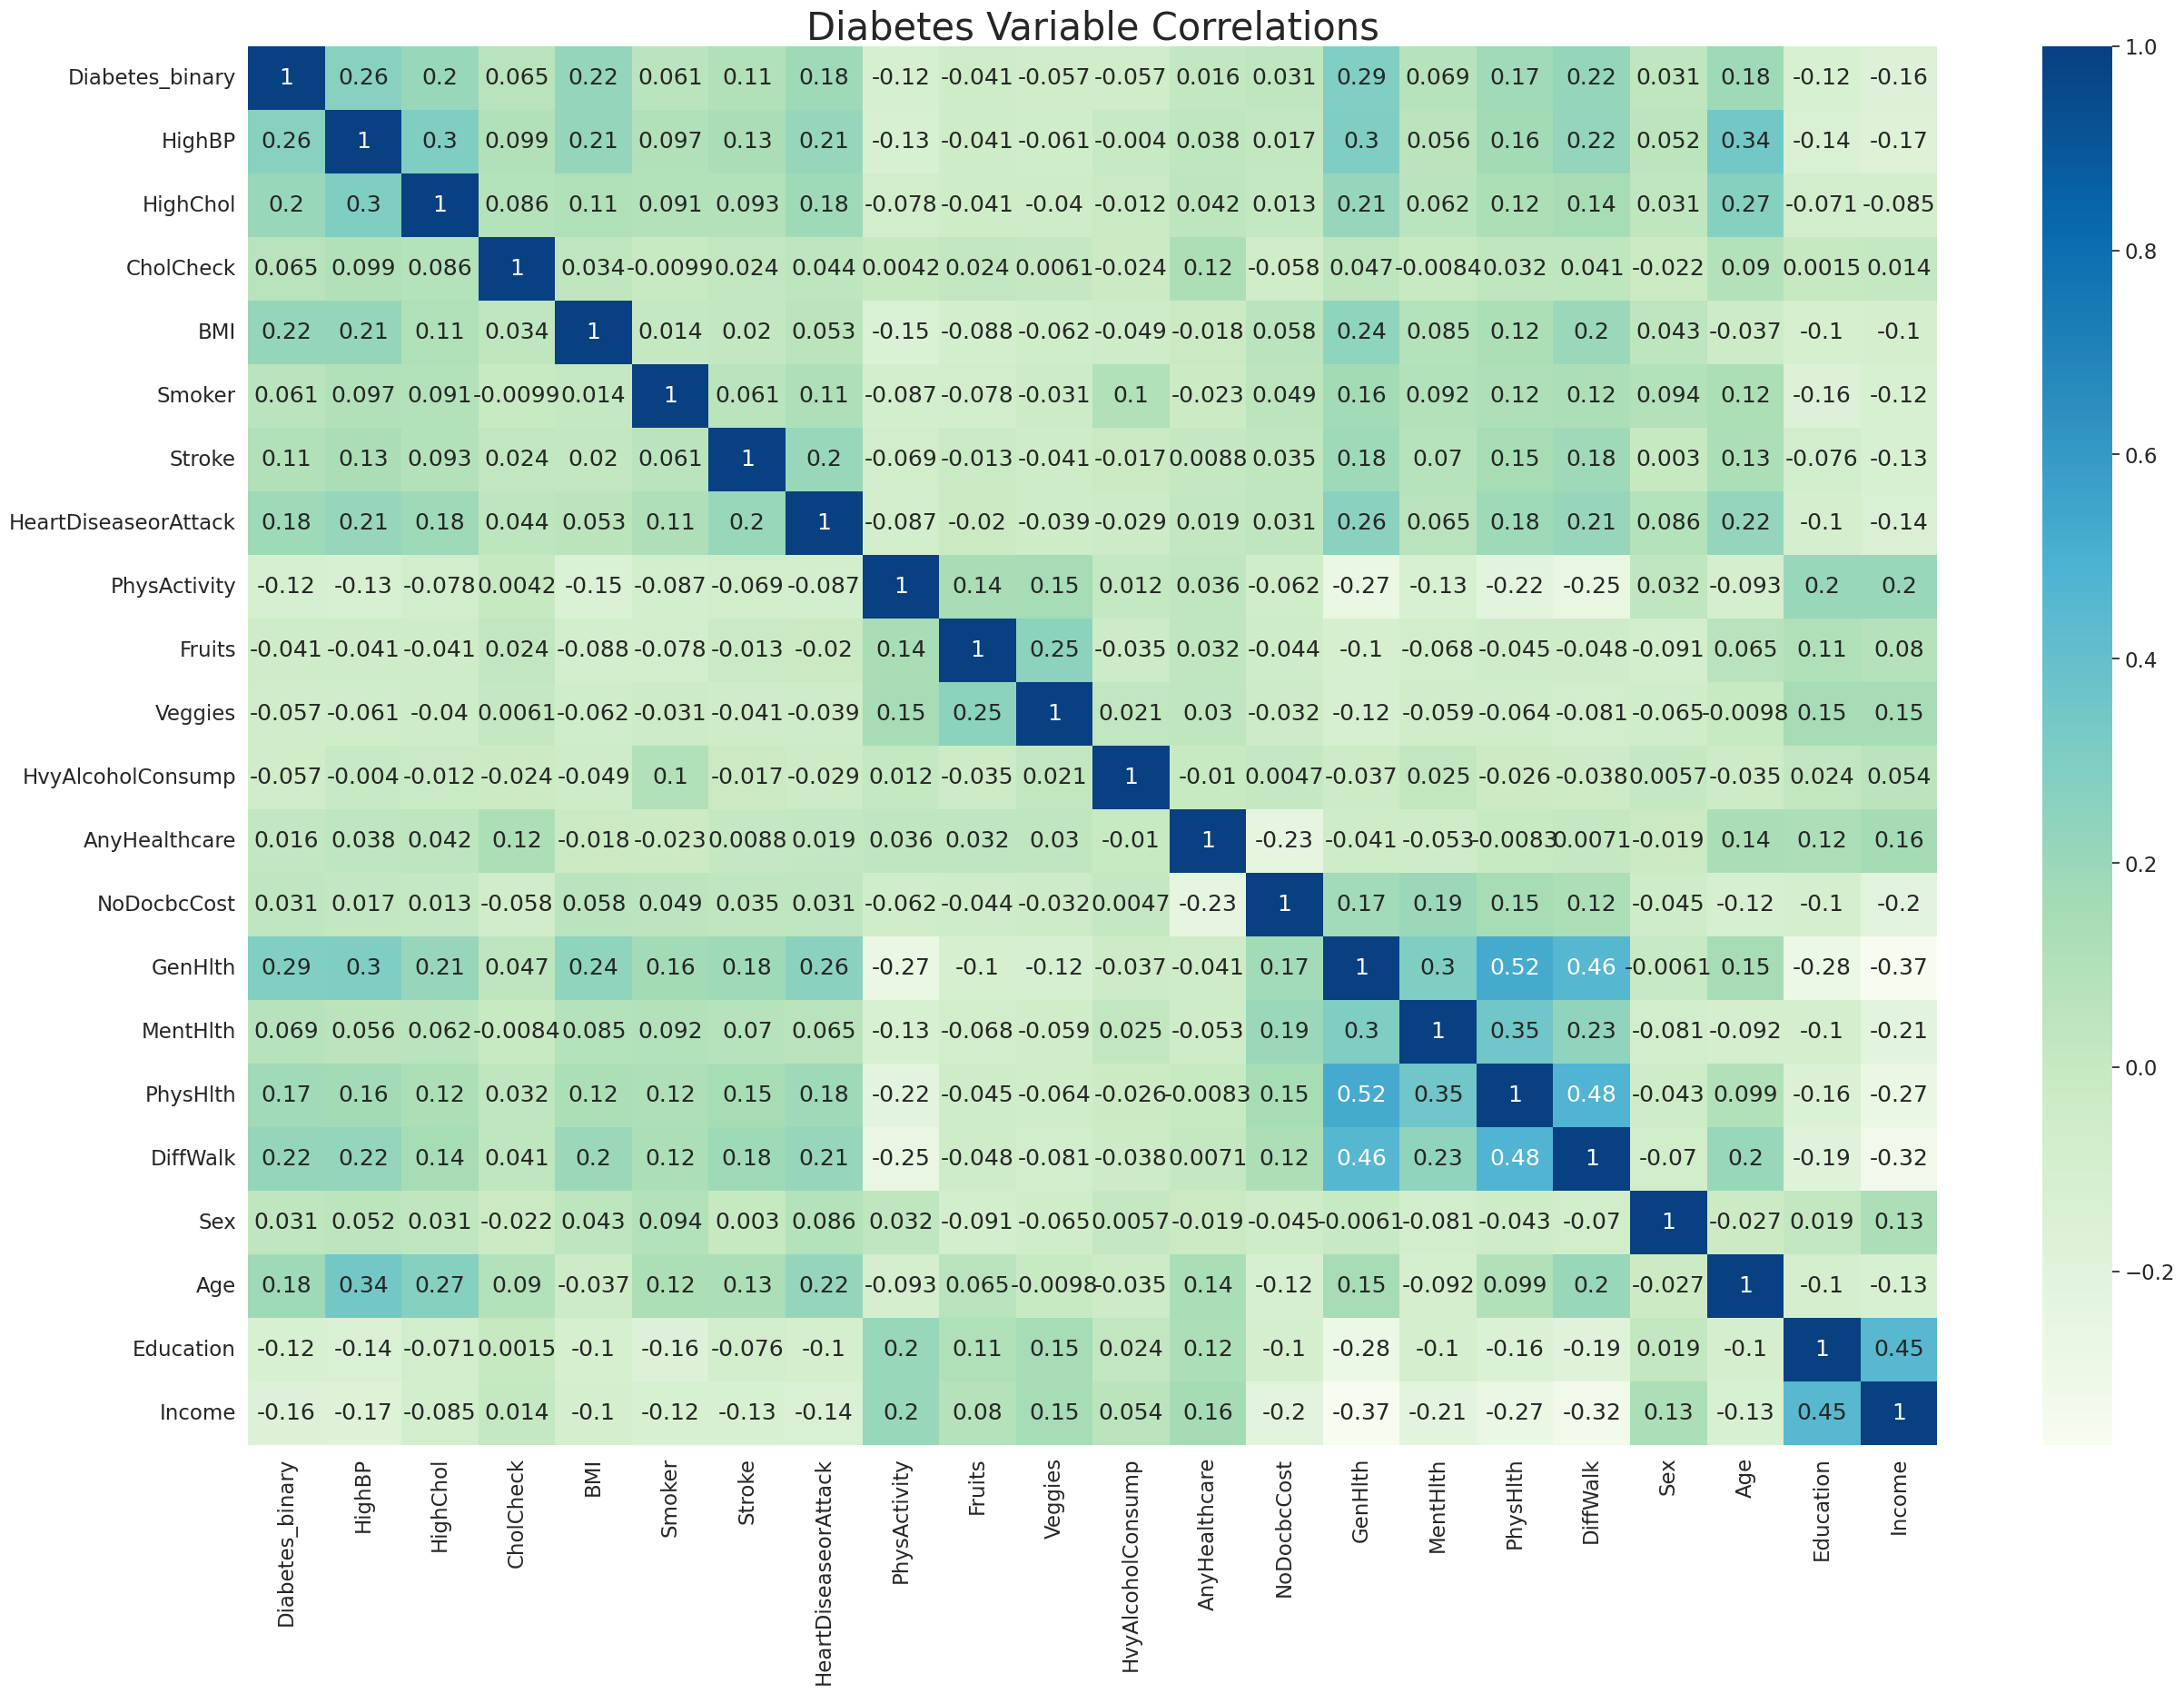

In [ ]:
# Check correlation using a heatmap
plt.figure(figsize = (30,20))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Diabetes Variable Correlations",fontsize=30)

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

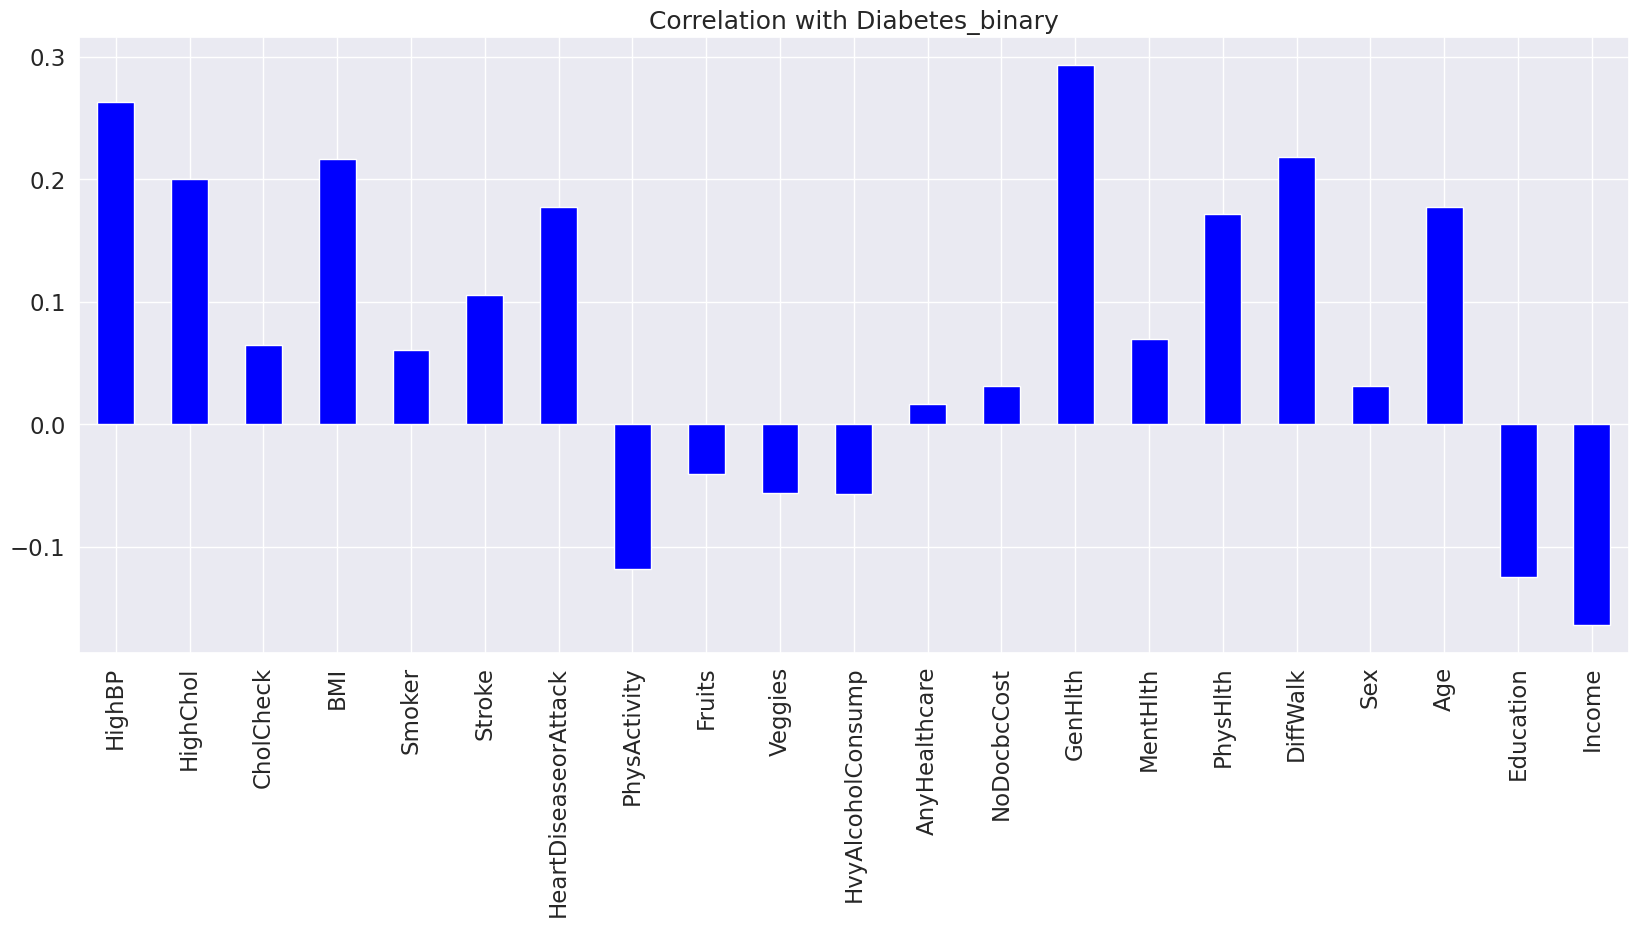

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Blue")

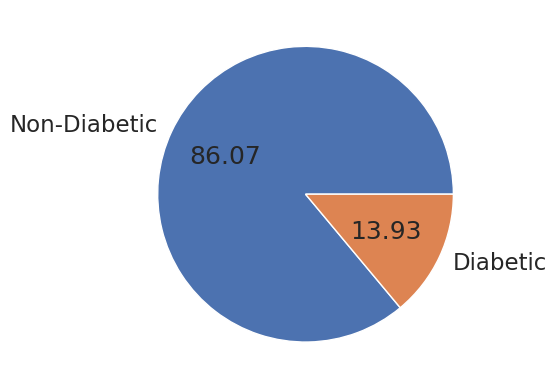

In [ ]:
# Obtain value counts of patients with diabetes
labels=["Non-Diabetic","Diabetic"]
plt.pie(df["Diabetes_binary"].value_counts(), labels =labels ,autopct='%.02f');

In [ ]:
df['Diabetes_binary_str']= df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

df['Diabetes_binary_str'].value_counts()

Non-Diabetic    218334
Diabetic         35346
Name: Diabetes_binary_str, dtype: int64

In [ ]:
# Create a variable that turns highBP into a string with labels for bar chart readability later
df["HighBP_str"]= df["HighBP"].replace({0:"No",1:"Yes"})

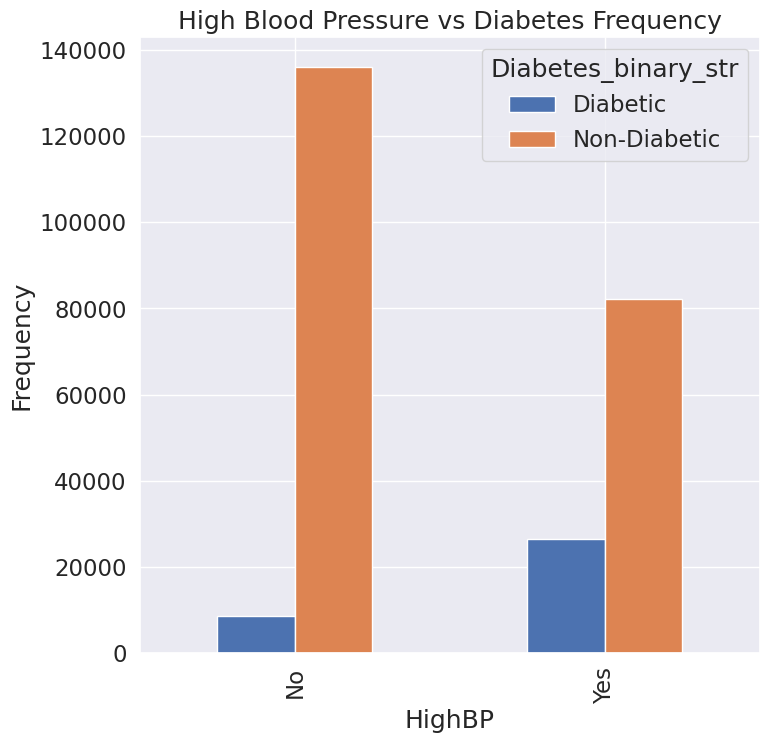

In [ ]:
# Checking the relation with HighBP and Diabetes_binary
pd.crosstab(df.HighBP_str,df.Diabetes_binary_str).plot(kind="bar",figsize=(8,8))

plt.title('High Blood Pressure vs Diabetes Frequency')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Obtain percentages for the relationship between high BP and diabetes
(df.groupby("Diabetes_binary_str")["HighBP_str"].value_counts()/df.groupby("Diabetes_binary_str")["HighBP_str"].count()).round(4)*100

Diabetes_binary_str  HighBP_str
Diabetic             Yes           75.27
                     No            24.73
Non-Diabetic         No            62.34
                     Yes           37.66
Name: HighBP_str, dtype: float64

In [ ]:
df['HighChol_str']=df['HighChol'].replace({0:"No",1:"Yes"})

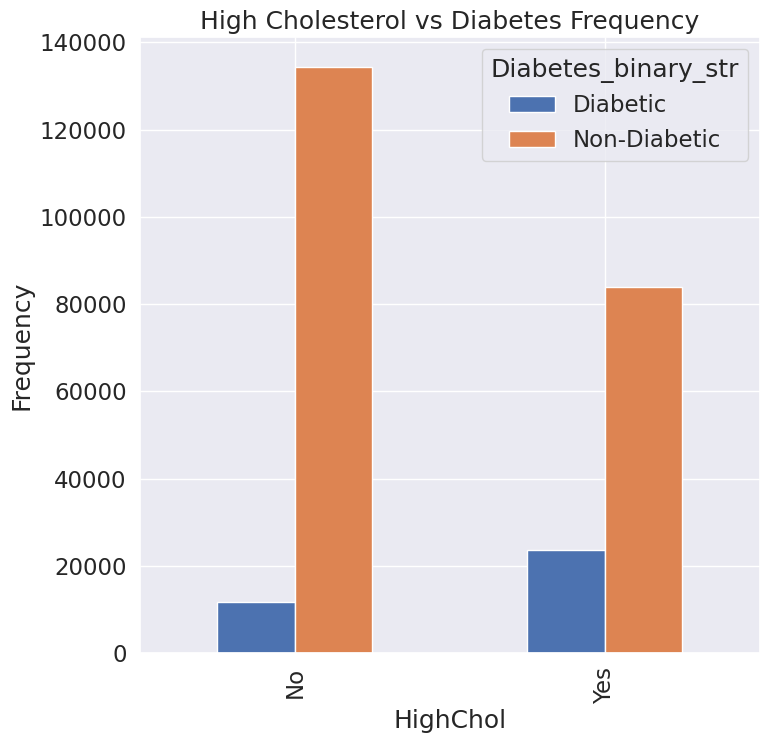

In [ ]:
pd.crosstab(df.HighChol_str,df.Diabetes_binary_str).plot(kind='bar', figsize=(8,8))

plt.title('High Cholesterol vs Diabetes Frequency')
plt.xlabel('HighChol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Obtain percentages
(df.groupby('Diabetes_binary_str')['HighBP_str'].value_counts()/df.groupby('Diabetes_binary_str')['HighChol_str'].count()).round(4)*100

Diabetes_binary_str  HighBP_str
Diabetic             Yes           75.27
                     No            24.73
Non-Diabetic         No            62.34
                     Yes           37.66
dtype: float64

In [ ]:
# Checking the correlation of HighBP and HighChol together against Diabetes_binary
(df.groupby(["HighBP_str", "HighChol_str"])["Diabetes_binary_str"].value_counts()/df.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary"].count()).round(4)*100

HighBP_str  HighChol_str  Diabetes_binary_str
No          No            Non-Diabetic           95.81
                          Diabetic                4.19
            Yes           Non-Diabetic           89.58
                          Diabetic               10.42
Yes         No            Non-Diabetic           83.27
                          Diabetic               16.73
            Yes           Non-Diabetic           70.29
                          Diabetic               29.71
dtype: float64

(15.0, 60.0)

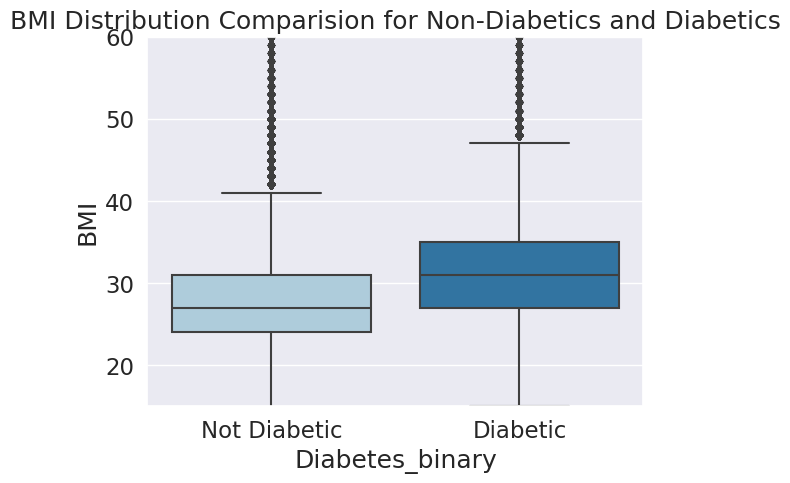

In [ ]:
# Check the distribution and outlier positioning in BMI
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI Distribution Comparision for Non-Diabetics and Diabetics')
ax.set_xticklabels(['Not Diabetic', 'Diabetic'])
plt.ylim(15, 60)

In [ ]:
# Obtain descriptive statistics for BMI for diabetic and non-diabetic
df.groupby('Diabetes_binary_str')['BMI'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary_str,,,,,,,,
Diabetic,35346.0,32.0,7.0,13.0,27.0,31.0,35.0,98.0
Non-Diabetic,218334.0,28.0,6.0,12.0,24.0,27.0,31.0,98.0


In [ ]:
#Divide dataset into two - diabetes and non_diabetes
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

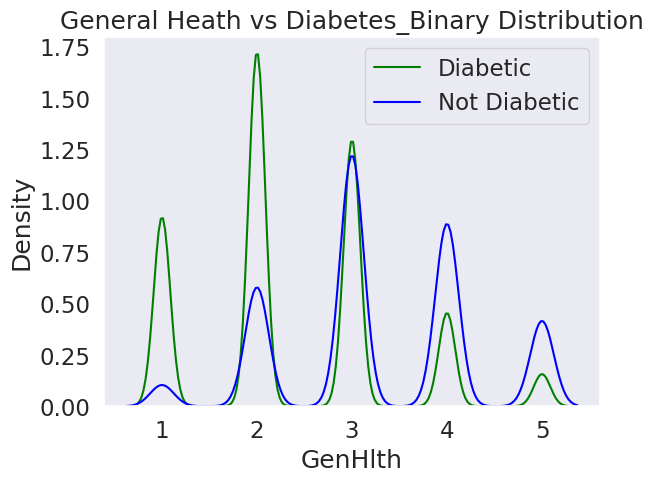

In [ ]:
sns.kdeplot(df_no_genhlth,color='green')
sns.kdeplot(df_yes_genhlth,color='blue')
plt.grid()
plt.title('General Heath vs Diabetes_Binary Distribution')
plt.legend(['Diabetic', 'Not Diabetic'])

In [ ]:
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

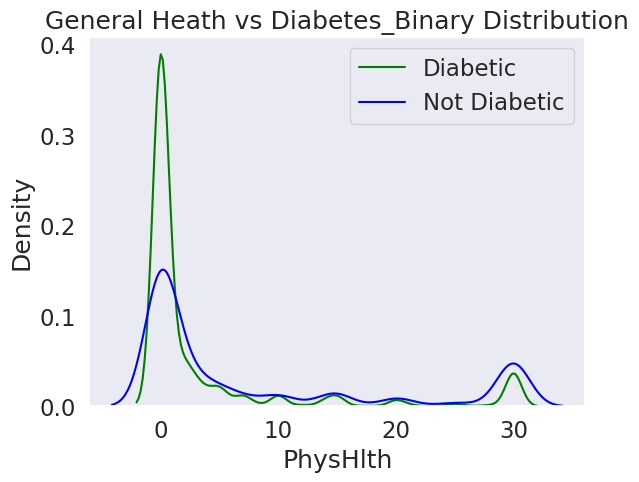

In [ ]:
sns.kdeplot(df_no_physhlth,color='green')
sns.kdeplot(df_yes_physhlth,color='blue')
plt.grid()
plt.title('General Heath vs Diabetes_Binary Distribution')
plt.legend(['Diabetic', 'Not Diabetic'])

In [ ]:
df["DiffWalk_str"]= df["DiffWalk"].replace({0:"No",1:"Yes"})

In [ ]:
(df.groupby("Diabetes_binary_str")["DiffWalk_str"].value_counts()/df.groupby("Diabetes_binary_str")["DiffWalk_str"].count()).round(4)*100

Diabetes_binary_str  DiffWalk_str
Diabetic             No              62.88
                     Yes             37.12
Non-Diabetic         No              86.46
                     Yes             13.54
Name: DiffWalk_str, dtype: float64

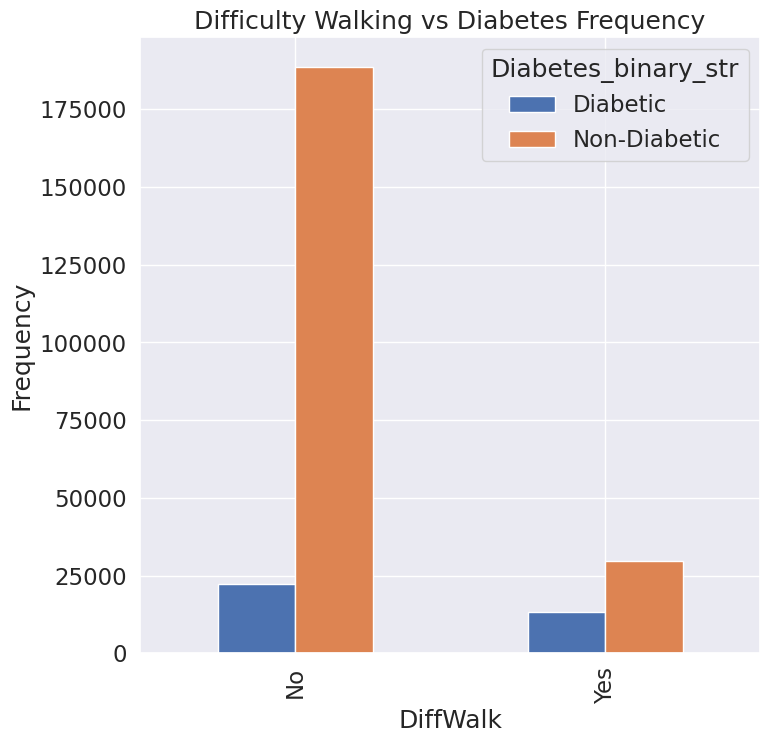

In [ ]:
pd.crosstab(df.DiffWalk_str,df.Diabetes_binary_str).plot(kind='bar', figsize=(8,8))

plt.title('Difficulty Walking vs Diabetes Frequency')
plt.xlabel('DiffWalk')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.HighBP_str)
contingency

HighBP_str,No,Yes
Diabetes_binary_str,,
Diabetic,8742,26604
Non-Diabetic,136109,82225


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Conduct chi-squared test
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.HighChol_str)
contingency

HighChol_str,No,Yes
Diabetes_binary_str,,
Diabetic,11660,23686
Non-Diabetic,134429,83905


In [ ]:
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Create variables before comparing BMI averages
df_no_bmi = df_no['BMI']
df_yes_bmi = df_yes['BMI']

In [ ]:
# Compare BMI averages across diabetics and non-diabetics
print('Average BMI for diabetics is {} and not diabetic is {} '.format(df_yes_bmi.mean().round(2),df_no_bmi.mean().round(2)))

Average BMI for diabetics is 31.94 and not diabetic is 27.81 


In [ ]:
from scipy import stats

In [ ]:
# Conduct a two sample ttest
ttest,p_value_1  = stats.ttest_ind(df_yes_bmi, df_no_bmi)
if p_value_1 < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Create variables before comparing GenHlth averages
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

In [ ]:
# Compare GenHlth averages across diabetics and non-diabetics
print('Average GenHlth self-rating for diabetics is {} and not diabetic is {} '.format(df_yes_genhlth.mean().round(2),df_no_genhlth.mean().round(2)))

Average GenHlth self-rating for diabetics is 3.29 and not diabetic is 2.39 


In [ ]:
# Conduct a two sample ttest
ttest,p_value_1  = stats.ttest_ind(df_yes_genhlth, df_no_genhlth)
if p_value_1 < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Create variables before comparing PhysHlth averages
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

In [ ]:
# Compare GenHlth averages across diabetics and non-diabetics
print('Average PhysHlth self-rating for diabetics is {} and not diabetic is {} '.format(df_yes_physhlth.mean().round(2),df_no_physhlth.mean().round(2)))

Average PhysHlth self-rating for diabetics is 7.95 and not diabetic is 3.64 


In [ ]:
# Conduct a two sample ttest
ttest,p_value_1  = stats.ttest_ind(df_yes_physhlth, df_no_physhlth)
if p_value_1 < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Prepare table
contingency= pd.crosstab(df.Diabetes_binary_str, df.DiffWalk_str)
contingency

DiffWalk_str,No,Yes
Diabetes_binary_str,,
Diabetic,22225,13121
Non-Diabetic,188780,29554


In [ ]:
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Feature Engineering

In [ ]:
# drop str variables (categorial variables) to prevent errors in ANOVA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_binary       253680 non-null  int64 
 1   HighBP                253680 non-null  int64 
 2   HighChol              253680 non-null  int64 
 3   CholCheck             253680 non-null  int64 
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  int64 
 6   Stroke                253680 non-null  int64 
 7   HeartDiseaseorAttack  253680 non-null  int64 
 8   PhysActivity          253680 non-null  int64 
 9   Fruits                253680 non-null  int64 
 10  Veggies               253680 non-null  int64 
 11  HvyAlcoholConsump     253680 non-null  int64 
 12  AnyHealthcare         253680 non-null  int64 
 13  NoDocbcCost           253680 non-null  int64 
 14  GenHlth               253680 non-null  int64 
 15  MentHlth         

In [ ]:
# drop str variables (categorial variables) to prevent errors in ANOVA
columns_to_drop = ['Diabetes_binary_str','HighBP_str','HighChol_str','DiffWalk_str']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
# Split the columns and designate Diabetes_binary as Y
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# define feature selection formula
fs = SelectKBest(score_func=f_classif,k=13)

In [ ]:
# apply feature selection
X_selected = fs.fit_transform(X,Y)
print(X_selected.shape)

(253680, 13)


In [ ]:
pd.DataFrame(X_selected).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,40,0,0,0,5,18,15,1,9,4,3
1,0,0,25,0,0,1,3,0,0,0,7,6,1
2,1,1,28,0,0,0,5,30,30,1,9,4,8
3,1,0,27,0,0,1,2,0,0,0,11,3,6
4,1,1,24,0,0,1,2,3,0,0,11,5,4


In [ ]:
# Import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Conduct a chi2 to utilize SelectKBest to extract the top 10 features
BestFeatures = SelectKBest(score_func=chi2, k=13)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

n=f_Scores.shape[0]

print(n)
f_Scores.sort_values(by=['Score']).iloc[n:7:-1]

21


,Feature,Score
15,PhysHlth,133424.406534
14,MentHlth,21029.632228
3,BMI,18355.166400
16,DiffWalk,10059.506391
0,HighBP,10029.013935
13,GenHlth,9938.507776
18,Age,9276.141199
6,HeartDiseaseorAttack,7221.975378
1,HighChol,5859.710582
20,Income,4829.816361


Pre-Processing and Hyperparameter Tuning

In [ ]:
# Choose columns for model based on correlation matrix
df_model = df[['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'GenHlth',
               'DiffWalk', 'Age', 'HeartDiseaseorAttack', 'PhysHlth','MentHlth','Stroke','PhysActivity','HvyAlcoholConsump']]

In [ ]:
# Train test split
x = df_model.drop('Diabetes_binary', axis=1)
y = df_model['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
# Drop unnecessary columns
unused_colomns = ['Fruits', 'Veggies', 'Sex', 'CholCheck', 'AnyHealthcare','Education','Smoker','NoDocbcCost']
df.drop(columns=unused_colomns, axis=1,inplace=True)

In [ ]:
# Confirm column drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Stroke                253680 non-null  int64
 5   HeartDiseaseorAttack  253680 non-null  int64
 6   PhysActivity          253680 non-null  int64
 7   HvyAlcoholConsump     253680 non-null  int64
 8   GenHlth               253680 non-null  int64
 9   MentHlth              253680 non-null  int64
 10  PhysHlth              253680 non-null  int64
 11  DiffWalk              253680 non-null  int64
 12  Age                   253680 non-null  int64
 13  Income                253680 non-null  int64
dtypes: int64(14)
memory usage: 27.1 MB


In [ ]:
# split data
X=df.drop('Diabetes_binary',axis=1)
Y=df['Diabetes_binary']

In [ ]:
Y.value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
# Alter class imbalance by randomly eliminating majority class samples
nm = NearMiss(version = 1,n_neighbors=5)
x_sm,y_sm=nm.fit_resample(X,Y)

In [ ]:
# Confirm nearmiss success
y_sm.shape , x_sm.shape

((70692,), (70692, 13))

In [ ]:
# Confirm nearmiss success
y_sm.value_counts()

0    35346
1    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
# Split training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [ ]:
# Verify the number of samples in the partitioned data
for x in [X_train, X_test, Y_train, Y_test]:
    print(len(x))

49484
21208
49484
21208


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
grid_models = [(KNeighborsClassifier(),[{'n_neighbors':[8,10,13],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute']}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy','log_loss'],'min_samples_leaf':[4,5,6],'max_depth':[8,10,13]}]),
               (RandomForestClassifier(),[{'n_estimators':[50,100,150,200],'max_depth':[8,10,13],'criterion':['gini','entropy'],'max_features':[1,3,5]}]),
               (LogisticRegression(),[{'C':[1.0, 0.80, 0.70]}]),
               (XGBClassifier(), [{'learning_rate': [0.01,0.03,0.05], 'min_child_weight':[1,3,5], 'eval_metric':['error','auc']}])]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

KNeighborsClassifier():
Best Accuracy : 84.58%
Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}

----------------

DecisionTreeClassifier():
Best Accuracy : 86.80%
Best Parameters :  {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 5}

----------------

RandomForestClassifier():
Best Accuracy : 87.86%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'n_estimators': 150}

----------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression():
Best Accuracy : 85.99%
Best Parameters :  {'C': 1.0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Best Accuracy : 87.91%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.05, 'min_child_weight': 1}

----------------



Model Construction

In [ ]:
# Fit the model on the training data
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=13, weights='uniform')
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8632
Test set score: 0.8502


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
# Check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

NameError: ignored

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

NameError: ignored

In [ ]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Decision Tree

In [ ]:
# Fit the model on the training data
dt = DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=5)
dt.fit(X_train,Y_train)


In [ ]:
# Make predictions on test data
y_pred=dt.predict(X_test)
print('Training set score: {:.4f}'.format(dt.score(X_train,Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_train,Y_train)))

In [ ]:
# Check MSE and RSME
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Mean Squared Error :'+str(rmse))

In [ ]:
# Create Decision Tree Classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

In [ ]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Random Forests

In [ ]:
# Fit the model on the training data
rf = RandomForestClassifier(max_depth=13, criterion='gini', n_estimators =200, min_samples_leaf=5, random_state=42)
rf.fit(X_train, Y_train)

In [ ]:
# Make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

In [ ]:
# Check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

In [ ]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True,colorbar=True)
plt.show()

Logistic Regression

In [ ]:
# First, perform normalization
means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [ ]:
# Fit the model on the training data
lg=LogisticRegression(C=1.0, random_state=42)
lg.fit(X_train,Y_train)

In [ ]:
# make initial predictions on test data and make the result 4 decimal places
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

In [ ]:
# check MSE & RMSE
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Root Mean Squared Error : '+str(rmse))

In [ ]:
matrix = classification_report(Y_test,y_pred)
print(matrix)

In [ ]:
# calculating the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True, colorbar=True)
plt.show()

XG Boost

In [ ]:
# Fit training data to model
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.05, min_child_weight=1)
xg.fit(X_train , Y_train)

In [ ]:
# Run predictions
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

In [ ]:
# Check Error: MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

In [ ]:
# Print classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

In [ ]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True,colorbar=True)
plt.show()